In [2]:
import matplotlib.pyplot as plt
from random_field import GaussianRF
import torch
from math import pi, sqrt

In [33]:
class GaussianRF2:
    """ Generate a Gaussain random field with N(0, sigma * (-delta + tau**2) ** (-alpha) )
    """

    def __init__(self, dim, size, length=1.0, alpha=2, tau=3, sigma=None, scale=1.0, boundary="periodic", device=None, dtype=torch.float64):

        self.dim = dim
        self.device = device

        if sigma is None:
            sigma = tau**(0.5*(2*alpha - self.dim))

        k_max = size//2

        if dim == 1:
            k = torch.cat((torch.arange(start=0, end=k_max, step=1, device=device, dtype=dtype), \
                           torch.arange(start=-k_max, end=0, step=1, device=device, dtype=dtype)), 0)

            self.sqrt_eig = size*sqrt(2.0)*sigma*((scale*4*(pi**2)*(k**2) + tau**2)**(-alpha/2.0))
            self.sqrt_eig[0] = 0.0

        elif dim == 2:
            wavenumers = torch.cat((torch.arange(start=0, end=k_max, step=1, device=device, dtype=dtype), \
                                    torch.arange(start=-k_max, end=0, step=1, device=device, dtype=dtype)), 0).repeat(size,1)

            k_x = wavenumers.transpose(0,1)
            k_y = wavenumers

            self.sqrt_eig = (size**2)*sqrt(2.0)*sigma*((scale*4*(pi**2)*(k_x**2 + k_y**2) + tau**2)**(-alpha/2.0))
            self.sqrt_eig[0,0] = 0.0

        elif dim == 3:
            wavenumers = torch.cat((torch.arange(start=0, end=k_max, step=1, device=device, dtype=dtype), \
                                    torch.arange(start=-k_max, end=0, step=1, device=device, dtype=dtype)), 0).repeat(size,size,1)

            k_x = wavenumers.transpose(1,2)
            k_y = wavenumers
            k_z = wavenumers.transpose(0,2)

            self.sqrt_eig = (size**3)*sqrt(2.0)*sigma*((scale*4*(pi**2)*(k_x**2 + k_y**2 + k_z**2) + tau**2)**(-alpha/2.0))
            self.sqrt_eig[0,0,0] = 0.0

        self.size = []
        for j in range(self.dim):
            self.size.append(size)

        self.size = tuple(self.size)

    def sample(self, N):

        coeff = torch.randn(N, *self.size, dtype=torch.cfloat, device=self.device)
        coeff = self.sqrt_eig * coeff

        return torch.fft.irfftn(coeff, self.size, dim=list(range(-1, -self.dim - 1, -1))), coeff

In [34]:
GRF1 = GaussianRF2(2, 256, alpha=2.5, tau=7, scale=0.0, device=torch.device("cpu"))
GRF2 = GaussianRF2(2, 256, alpha=2.5, tau=7, scale=1.0, device=torch.device("cpu"))
GRF3 = GaussianRF2(2, 256, alpha=2.5, tau=7, scale=10.0, device=torch.device("cpu"))
GRF4 = GaussianRF2(2, 256, alpha=2.5, tau=7, scale=100.0, device=torch.device("cpu"))

In [36]:
grf1, coeff1 = GRF1.sample(1)
grf2, coeff2 = GRF2.sample(1)
grf3, coeff3 = GRF3.sample(1)
grf4, coeff4 = GRF4.sample(1)

In [38]:
grf1 = grf1[0]
coeff1 = coeff1[0]
grf2 = grf2[0]
coeff2 = coeff2[0]
grf3 = grf3[0]
coeff3 = coeff3[0]
grf4 = grf4[0]
coeff4 = coeff4[0]

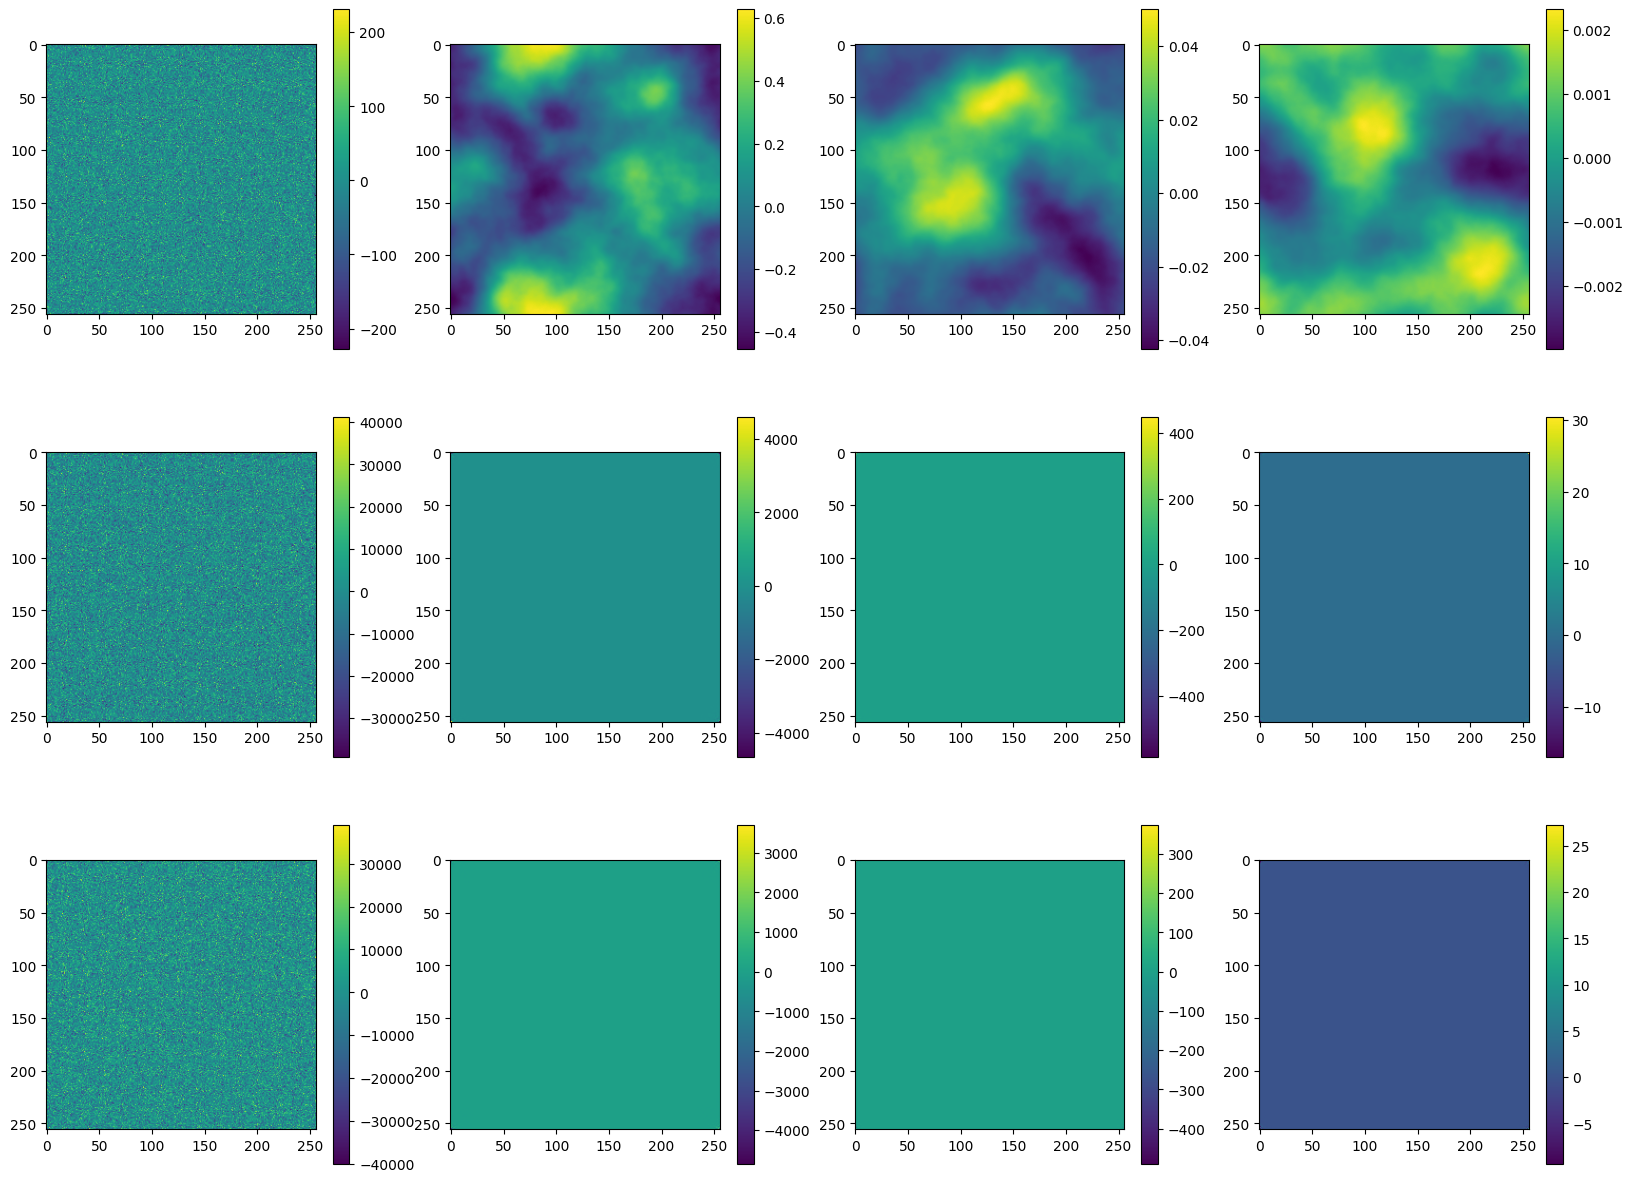

In [42]:
plt.figure(figsize=(20,15))
plt.subplot(3,4,1)
plt.imshow(grf1)
plt.colorbar()
plt.subplot(3,4,2)
plt.imshow(grf2)
plt.colorbar()
plt.subplot(3,4,3)
plt.imshow(grf3)
plt.colorbar()
plt.subplot(3,4,4)
plt.imshow(grf4)
plt.colorbar()
plt.subplot(3,4,5)
plt.imshow(coeff1.real)
plt.colorbar()
plt.subplot(3,4,6)
plt.imshow(coeff2.real)
plt.colorbar()
plt.subplot(3,4,7)
plt.imshow(coeff3.real)
plt.colorbar()
plt.subplot(3,4,8)
plt.imshow(coeff4.real)
plt.colorbar()
plt.subplot(3,4,9)
plt.imshow(coeff1.imag)
plt.colorbar()
plt.subplot(3,4,10)
plt.imshow(coeff2.imag)
plt.colorbar()
plt.subplot(3,4,11)
plt.imshow(coeff3.imag)
plt.colorbar()
plt.subplot(3,4,12)
plt.imshow(coeff4.imag)
plt.colorbar()
plt.show()